Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = ""
STUDENTID = ""
GROUPID = "";TESTTESTTESTTESTTESTTESTTESTTESTTEST

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

In [ ]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df = pd.read_csv("final_processed_data.csv")  # adjust filename if needed

# Filter for 2014 and 2019
df_2014 = df[df['year'] == 2014][['eli_pct', 'abmi_pct']].dropna()
df_2019 = df[df['year'] == 2019][['eli_pct', 'abmi_pct']].dropna()

# Manually compute Pearson correlation
r_2014 = df_2014['eli_pct'].corr(df_2014['abmi_pct'])
r_2019 = df_2019['eli_pct'].corr(df_2019['abmi_pct'])

# Compute regression lines (y = mx + b)
m_2014, b_2014 = np.polyfit(df_2014['eli_pct'], df_2014['abmi_pct'], 1)
m_2019, b_2019 = np.polyfit(df_2019['eli_pct'], df_2019['abmi_pct'], 1)

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 2014 plot
axes[0].scatter(df_2014['eli_pct'], df_2014['abmi_pct'], alpha=0.5)
axes[0].plot(df_2014['eli_pct'], m_2014 * df_2014['eli_pct'] + b_2014, color='red')
axes[0].set_title(f'ELI % vs ABMI % (2014)\nPearson r = {r_2014:.2f}')
axes[0].set_xlabel('Extremely Low Income % (ELI)')
axes[0].set_ylabel('Above Moderate Income % (ABMI)')
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)
axes[0].grid(True)

# 2019 plot
axes[1].scatter(df_2019['eli_pct'], df_2019['abmi_pct'], alpha=0.5, color='orange')
axes[1].plot(df_2019['eli_pct'], m_2019 * df_2019['eli_pct'] + b_2019, color='red')
axes[1].set_title(f'ELI % vs ABMI % (2019)\nPearson r = {r_2019:.2f}')
axes[1].set_xlabel('Extremely Low Income % (ELI)')
axes[1].set_xlim(left=0)
axes[1].set_ylim(bottom=0)
axes[1].grid(True)

plt.tight_layout()
plt.show()

##
#raise NotImplementedError()
import pandas as pd
import matplotlib.pyplot as plt

# Load and merge data
df = pd.read_csv("final_processed_data.csv")
mapping_df = pd.read_csv("census_tract_incomes.csv")

mapping_df['geo_id2'] = mapping_df['geo_id2'].astype(str)
df['geoid20'] = df['geoid20'].astype(str)
df = df.merge(mapping_df, left_on='geoid20', right_on='geo_id2', how='left')
df['county'] = df['name'].str.extract(r',\s*(.*?)\s*County', expand=False) + " County"

# Extract short tract ID
df['tract_id'] = df['geoid20'].str[-6:]

# Calculate exclusive income group percentages
df['ex_eli_pct'] = df['eli_pct']
df['ex_vli_pct'] = df['vli_pct'] - df['eli_pct']
df['ex_li_pct'] = df['li_pct'] - df['vli_pct']
df['ex_mi_pct'] = df['mi_pct'] - df['li_pct']
df['ex_abmi_pct'] = df['abmi_pct']  # assumed to be already exclusive

# Filter for one specific tract (e.g., 128102)
tract_df = df[df['tract_id'] == '128102'].sort_values('year')

# Plot exclusive income groups over time as separate lines
exclusive_cols = ['ex_eli_pct', 'ex_vli_pct', 'ex_li_pct', 'ex_mi_pct', 'ex_abmi_pct']
labels = ['ELI', 'VLI', 'LI', 'MI', 'ABMI']

plt.figure(figsize=(10, 6))
for col, label in zip(exclusive_cols, labels):
    plt.plot(tract_df['year'], tract_df[col], marker='o', label=label)

plt.title('Exclusive Income Group Trends Over Time\nCensus Tract 1281.02, Los Angeles County')
plt.xlabel('Year')
plt.ylabel('Exclusive Share of Households (%)')
plt.legend(title='Income Group')
plt.grid(True)
plt.tight_layout()
plt.show()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

Attempting to load data from: data/data_notebook-notebook-1_dataset2.json
Successfully loaded 10000 records.

--- Converting Dates ---
10000 records remaining after removing NaT dates.
Full date range after conversion: 2010-01-01 00:00:00 to 2019-12-31 00:00:00

--- Checking 2013 Data After Date Cleaning ---
Number of records dated 2013 after date cleaning: 1246
Sample 2013 crime descriptions (before top 5 filter):
crm_cd_desc
BATTERY - SIMPLE ASSAULT                                   129
BURGLARY FROM VEHICLE                                      102
THEFT PLAIN - PETTY ($950 & UNDER)                          94
BURGLARY                                                    86
VEHICLE - STOLEN                                            83
THEFT OF IDENTITY                                           83
INTIMATE PARTNER - SIMPLE ASSAULT                           73
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             62
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     58
RO

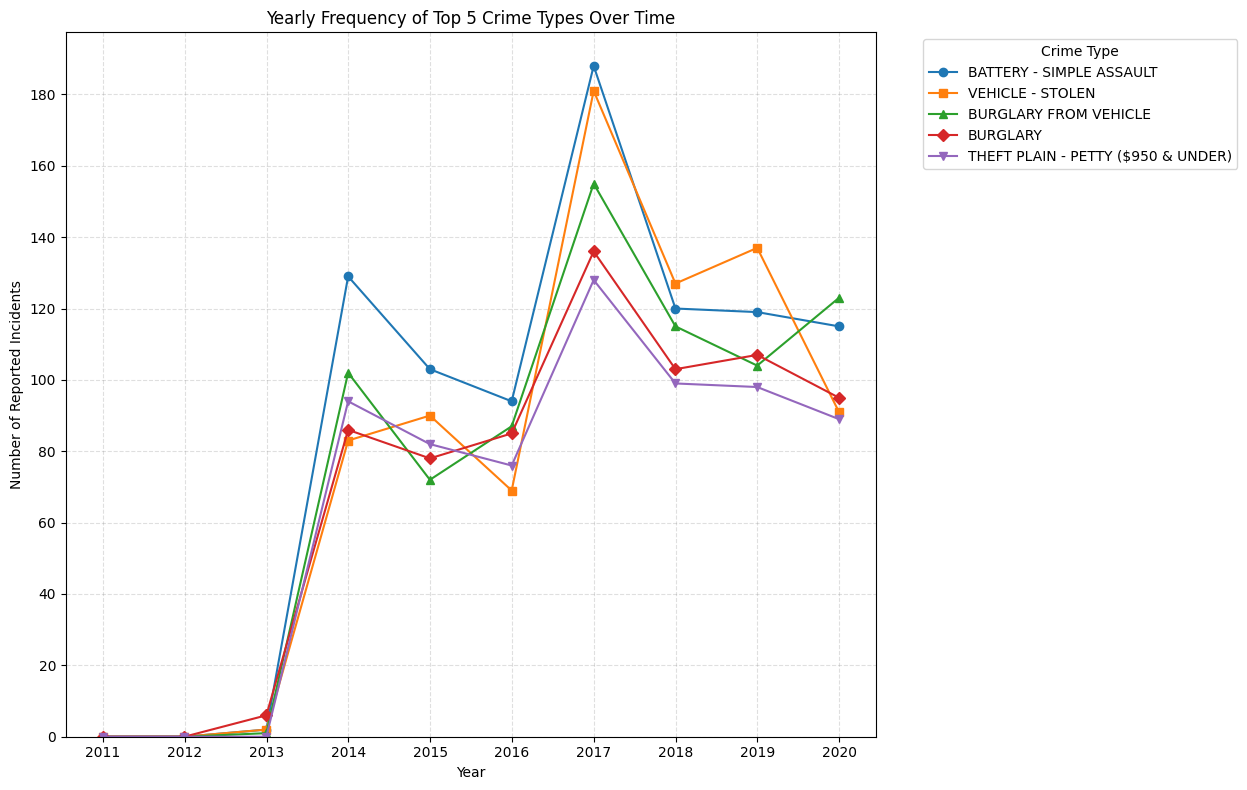

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import os
import traceback # Import traceback for detailed error printing

# --- Define File Path ---
data_folder = 'data'
# Make sure this filename matches exactly, including case sensitivity if needed
file_name = 'data_notebook-notebook-1_dataset2.json'
file_path = os.path.join(data_folder, file_name)

try:
    # --- Data Loading ---
    print(f"Attempting to load data from: {file_path}")
    df = pd.read_json(file_path)
    print(f"Successfully loaded {len(df)} records.")

    # --- Data Processing ---
    required_cols = ['crm_cd_desc', 'date_occ']
    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        raise ValueError(f"Missing required columns: {missing}")

    # --- Date Conversion ---
    print("\n--- Converting Dates ---")
    df['date_occ'] = pd.to_datetime(df['date_occ'], errors='coerce')
    nat_count = df['date_occ'].isna().sum()
    if nat_count > 0:
        print(f"Warning: {nat_count} rows had invalid date formats and were coerced to NaT.")
    # Keep a copy before dropping NaNs for full date range calculation later
    df_with_dates = df.dropna(subset=['date_occ']).copy()
    print(f"{len(df_with_dates)} records remaining after removing NaT dates.")
    if df_with_dates.empty: raise ValueError("No valid dates found after conversion.")
    min_date, max_date = df_with_dates['date_occ'].min(), df_with_dates['date_occ'].max()
    print(f"Full date range after conversion: {min_date} to {max_date}")

    # --- DIAGNOSTIC: Check 2013 data AFTER date cleaning ---
    print("\n--- Checking 2013 Data After Date Cleaning ---")
    df_2013_after_date_clean = df_with_dates[df_with_dates['date_occ'].dt.year == 2013].copy() # Use .copy()
    print(f"Number of records dated 2013 after date cleaning: {len(df_2013_after_date_clean)}")
    if not df_2013_after_date_clean.empty:
        print("Sample 2013 crime descriptions (before top 5 filter):")
        print(df_2013_after_date_clean['crm_cd_desc'].value_counts().head(10))
    # --- END DIAGNOSTIC ---

    # --- Top 5 Crimes (Calculated on the *entire* valid date range) ---
    # Drop NaNs in crime description *before* calculating top 5
    df_cleaned = df_with_dates.dropna(subset=['crm_cd_desc']).copy()
    print(f"\n{len(df_cleaned)} records remaining after removing NaN crime descriptions.")
    crime_counts = df_cleaned['crm_cd_desc'].value_counts()
    if crime_counts.empty: raise ValueError("No crime descriptions found.")
    top_5_crime_list = crime_counts.head(5).index.tolist()
    print(f"\nOverall Top 5 Crime Types (based on {min_date.year}-{max_date.year} dataset): {top_5_crime_list}")

    # --- Filter DataFrame for Top 5 Crimes ---
    df_top5 = df_cleaned[df_cleaned['crm_cd_desc'].isin(top_5_crime_list)].copy()
    print(f"\n{len(df_top5)} records belong to the overall top 5 crime types.")
    if df_top5.empty: raise ValueError("No records found matching the top 5 crimes.")

    # --- DIAGNOSTIC: Check 2013 data AFTER top 5 filter ---
    print("\n--- Checking 2013 Data After Top 5 Filter ---")
    df_top5_2013 = df_top5[df_top5['date_occ'].dt.year == 2013]
    print(f"Number of Top 5 crime records dated 2013: {len(df_top5_2013)}")
    if not df_top5_2013.empty:
         print("Crime descriptions in 2013 (Top 5 Filtered):")
         print(df_top5_2013['crm_cd_desc'].value_counts())
    else:
         print("Conclusion: No records from 2013 matched the overall Top 5 crime list.")
         if not df_2013_after_date_clean.empty:
             print("This means the crimes that *did* occur in 2013 were not among the overall top 5.")
    # --- END DIAGNOSTIC ---

    # --- Aggregate Yearly ---
    df_top5.set_index('date_occ', inplace=True)
    if not isinstance(df_top5.index, pd.DatetimeIndex):
         raise TypeError("Index is not DatetimeIndex before resampling.")

    # --- DIAGNOSTIC: Check index before resampling ---
    print("\n--- Index Check Before Resampling ---")
    if not df_top5.empty:
        print(f"Index min: {df_top5.index.min()}, Index max: {df_top5.index.max()}")
        print(f"Is 2013 present in the index of df_top5? {'Yes' if any(df_top5.index.year == 2013) else 'No'}")
    else:
        print("df_top5 is empty before resampling.")
    # --- END DIAGNOSTIC ---

    crime_over_time = df_top5.groupby([pd.Grouper(freq='YE'), 'crm_cd_desc']).size()

    # --- Restructure ---
    crime_pivot = crime_over_time.unstack(level='crm_cd_desc', fill_value=0)
    for crime in top_5_crime_list:
        if crime not in crime_pivot.columns: crime_pivot[crime] = 0

    # --- REINDEX TO FULL DATE RANGE ---
    # Use the min/max dates calculated earlier from df_with_dates
    print("\n--- Reindexing Pivot Table to Full Date Range ---")
    if not df_with_dates.empty:
        # Create a complete DatetimeIndex for every year end in the full range
        all_years_index = pd.date_range(start=min_date, end=max_date, freq='YE')

        print(f"Original pivot index range: {crime_pivot.index.min().year if not crime_pivot.empty else 'N/A'} to {crime_pivot.index.max().year if not crime_pivot.empty else 'N/A'}")
        print(f"Expected full range based on data: {all_years_index.min().year} to {all_years_index.max().year}")

        # Reindex the pivot table using the complete yearly index.
        # Missing years will be added with the specified fill_value (0).
        crime_pivot = crime_pivot.reindex(all_years_index, fill_value=0)

        print("Pivot table index after reindexing:")
        print(crime_pivot.index)
        print("\nFirst few rows after reindexing (should include earliest years):")
        print(crime_pivot.head())
    else:
        print("Skipping reindexing because initial date processing failed.")
    # --- END REINDEX ---


    # --- DIAGNOSTIC: Check Pivot Table for 2013 ---
    print("\n--- Checking Pivot Table for 2013 (After Reindex) ---")
    year_end_2013 = pd.Timestamp('2013-12-31')
    if year_end_2013 in crime_pivot.index:
        print("Row for 2013-12-31 in final pivot table:")
        print(crime_pivot.loc[year_end_2013])
    else:
        # This should only happen now if 2013 was outside the min/max date range
        print("No index entry found for 2013-12-31 in the final pivot table.")
    # --- END DIAGNOSTIC ---


    # --- Pre-Plot Checks ---
    print("\n--- Pre-Plot Data Check ---")
    print("Pivot table info:")
    crime_pivot.info()
    print("\nFirst 5 rows of pivot table:")
    print(crime_pivot.head())
    print(f"\nPivot index type: {type(crime_pivot.index)}, dtype: {crime_pivot.index.dtype}")
    if crime_pivot.empty: raise ValueError("Pivot table is empty.")
    if not isinstance(crime_pivot.index, pd.DatetimeIndex): print("Warning: Pivot index not DatetimeIndex.")
    # Check if all plotted values are zero AFTER reindexing
    if not crime_pivot.empty and (crime_pivot[top_5_crime_list].values == 0).all():
        print("Warning: All data values in the pivot table for top 5 crimes are zero (possibly after reindexing).")


    # --- Visualization ---
    print("\n--- Plotting ---")
    if crime_pivot.empty:
        print("Cannot plot, pivot table is empty.")
    else:
        # Get range from the potentially reindexed pivot table
        plot_min_year = crime_pivot.index.min().year
        plot_max_year = crime_pivot.index.max().year
        print(f"Plotting data from {plot_min_year} to {plot_max_year}")

        fig, ax = plt.subplots(figsize=(15, 8))

        # Plot using ax.plot directly
        markers = ['o', 's', '^', 'D', 'v'] # Different marker for each line
        for i, crime in enumerate(top_5_crime_list):
            if crime in crime_pivot.columns:
                 # Ensure index and values are passed correctly
                 ax.plot(crime_pivot.index, crime_pivot[crime], marker=markers[i % len(markers)], linestyle='-', label=crime)
            else:
                 print(f"Warning: Column '{crime}' not found in pivot table for plotting.")

        # --- Customize Plot ---
        ax.set_title('Yearly Frequency of Top 5 Crime Types Over Time')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Reported Incidents')
        ax.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
        ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax.set_ylim(bottom=0) # Keep Y starting at 0

        # --- X-axis Limit and Tick Handling ---
        # Set the locator and formatter *after* plotting
        ax.xaxis.set_major_locator(mdates.YearLocator(base=1)) # Ensure ticks are on the year
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


        plt.xticks(rotation=0, ha='center') # Horizontal labels for years
        # Adjust layout to prevent labels/legend overlapping
        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Shrink plot area slightly for legend
        plt.show()

# --- Error Handling ---
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    print("Please ensure the 'data' folder exists in the same directory and the filename is correct.")
except ValueError as ve:
    print(f"Data Processing Error: {ve}")
    traceback.print_exc() # Show traceback for ValueErrors
except TypeError as te:
     print(f"Type Error: {te}")
     traceback.print_exc() # Show traceback for TypeErrors
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    traceback.print_exc() # Print detailed traceback for any other errors

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()